In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import warnings
warnings.filterwarnings('ignore')

In [53]:
bike_data = pd.read_csv('bike_clean.csv')

In [54]:
bike_data.head()

,bike_id,bike_type,passholder_type,duration,trip_route_category,estimated_fare,temperature,humidity,windspeed,weather,start_station,end_station,start_time,end_time,start_lat_lon,end_lat_lon
0,12017,standard,Walk-up,26,One Way,1.75,54,17,5,Few Clouds,3005.0,3082.0,2018-12-31 23:56:00,2019-01-01 00:22:00,"(34.0485, -118.25853700000002)","(34.04652, -118.23741100000001)"
1,12128,standard,Walk-up,28,One Way,1.75,54,17,5,Few Clouds,3005.0,3082.0,2018-12-31 23:54:00,2019-01-01 00:22:00,"(34.0485, -118.25853700000002)","(34.04652, -118.23741100000001)"
2,12347,standard,Walk-up,97,One Way,7.00,54,17,5,Few Clouds,4211.0,4210.0,2018-12-31 23:51:00,2019-01-01 01:28:00,"(33.984928000000004, -118.46996299999999)","(33.984341, -118.47155)"
3,5730,standard,Walk-up,7,Round Trip,1.75,54,17,5,Few Clouds,3069.0,3069.0,2018-12-31 23:47:00,2018-12-31 23:54:00,"(34.05088, -118.248253)","(34.05088, -118.248253)"
4,6222,standard,Walk-up,9,Round Trip,1.75,54,17,5,Few Clouds,3069.0,3069.0,2018-12-31 23:46:00,2018-12-31 23:55:00,"(34.05088, -118.248253)","(34.05088, -118.248253)"


We will be investigating how having different passholder types impacts where the rider picks up/returns the bike. In Los Angeles, there are plenty of fun and exciting activities to do. How does having a different passholder type affect the start/end stations that the riders go to? Do the same passholder types generally go to the same stations?

Let's begin by checking how many of each passholder type there are.

In [55]:
bike_data['passholder_type'].value_counts()

Monthly Pass    367146
Walk-up         222104
Flex Pass        25160
One Day Pass     23319
Annual Pass       2057
Name: passholder_type, dtype: int64

As you can see, there are a total of five different passholder types. We will only be analyzing riders with the Monthly and Walk-up pass as they make up over 92% of the total riders.

Let's start with the walk-up riders.

In [56]:
walk_up = (bike_data.loc[bike_data['passholder_type'] == 'Walk-up'])
walk_up.head()

,bike_id,bike_type,passholder_type,duration,trip_route_category,estimated_fare,temperature,humidity,windspeed,weather,start_station,end_station,start_time,end_time,start_lat_lon,end_lat_lon
0,12017,standard,Walk-up,26,One Way,1.75,54,17,5,Few Clouds,3005.0,3082.0,2018-12-31 23:56:00,2019-01-01 00:22:00,"(34.0485, -118.25853700000002)","(34.04652, -118.23741100000001)"
1,12128,standard,Walk-up,28,One Way,1.75,54,17,5,Few Clouds,3005.0,3082.0,2018-12-31 23:54:00,2019-01-01 00:22:00,"(34.0485, -118.25853700000002)","(34.04652, -118.23741100000001)"
2,12347,standard,Walk-up,97,One Way,7.00,54,17,5,Few Clouds,4211.0,4210.0,2018-12-31 23:51:00,2019-01-01 01:28:00,"(33.984928000000004, -118.46996299999999)","(33.984341, -118.47155)"
3,5730,standard,Walk-up,7,Round Trip,1.75,54,17,5,Few Clouds,3069.0,3069.0,2018-12-31 23:47:00,2018-12-31 23:54:00,"(34.05088, -118.248253)","(34.05088, -118.248253)"
4,6222,standard,Walk-up,9,Round Trip,1.75,54,17,5,Few Clouds,3069.0,3069.0,2018-12-31 23:46:00,2018-12-31 23:55:00,"(34.05088, -118.248253)","(34.05088, -118.248253)"


There are a lot of columns that we do not need for our analysis. Let's drop some of them.

In [57]:
walk_up = walk_up.drop(columns=['bike_type','temperature','humidity','windspeed','weather','start_time','end_time','start_lat_lon','end_lat_lon'])
walk_up.head()

,bike_id,passholder_type,duration,trip_route_category,estimated_fare,start_station,end_station
0,12017,Walk-up,26,One Way,1.75,3005.0,3082.0
1,12128,Walk-up,28,One Way,1.75,3005.0,3082.0
2,12347,Walk-up,97,One Way,7.00,4211.0,4210.0
3,5730,Walk-up,7,Round Trip,1.75,3069.0,3069.0
4,6222,Walk-up,9,Round Trip,1.75,3069.0,3069.0


That's a lot better! Now, we can separate the walk-up riders' start station and end station and see where most of the riders with a walk-up pass go. Since there are over 100 stations, we will just take the top 20 most frequently used start and end stations.

In [58]:
walk_up_start = walk_up['start_station'].value_counts().to_frame(name='trips')
walk_up_end = walk_up['end_station'].value_counts().to_frame(name='trips')
top_20_walk_up_start = walk_up_start.reset_index().rename(columns={'index': 'start_station'})[:20]
top_20_walk_up_end = walk_up_end.reset_index().rename(columns={'index': 'end_station'})[:20]

Let's start with start stations.

In [59]:
top_20_walk_up_start.head()

,start_station,trips
0,4214.0,17558
1,4210.0,12611
2,4215.0,6696
3,3069.0,5720
4,3082.0,5057


Station 4214 has a lot of trips! Let's add the corresponding station information to each station number so we know more about these stations that the riders start at. 

In [60]:
stations = pd.read_csv('data/metro-bike-share-stations-2019-01-07.csv')
stations.head()

,Station_ID,Station_Name,Go_live_date,Region,Status
0,4108,1 LA warehouse,7/7/2016,DTLA,Inactive
1,3010,11th & Maple,7/10/2016,DTLA,Active
2,3059,11th & Santee,7/7/2016,DTLA,Inactive
3,3053,12th & Grand,7/7/2016,DTLA,Inactive
4,3019,12th & Hill,7/7/2016,DTLA,Active


There are some stations that are inactive. Let's get rid of all the inactive stations.

In [61]:
stations = (stations.loc[stations['Status'] == 'Active'])
stations = stations.drop(columns=['Go_live_date'])
stations.head()

,Station_ID,Station_Name,Region,Status
1,3010,11th & Maple,DTLA,Active
4,3019,12th & Hill,DTLA,Active
5,4216,17th St / SMC Expo Line Station,Venice,Active
6,3057,18th & Figueroa,DTLA,Active
7,3045,18th & San Pedro,DTLA,Active


Now that we have information for each station, let's merge that information together so that each station has its corresponding information.

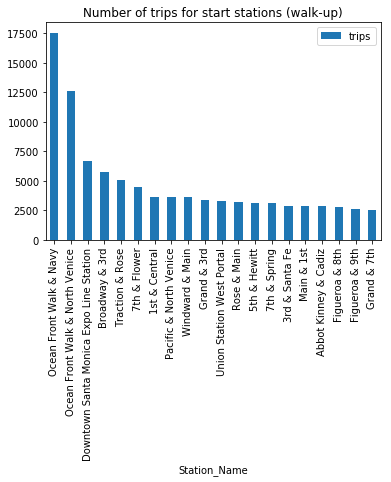

In [62]:
top_20_walk_up_start = top_20_walk_up_start.merge(stations,left_on='start_station',right_on='Station_ID')
top_20_walk_up_start = top_20_walk_up_start.drop(columns=['Station_ID'])
top_20_walk_up_start.plot(x='Station_Name',y='trips',kind='bar',title='Number of trips for start stations (walk-up)')

As you can see, riders with the walk-up pass mostly prefer to start on the "Ocean Front Walk & Navy" and "Ocean Front Walk & North Venice" stations.

We know the specific station names & streets, but let's check the overall region for each station so we can see more clearly why bikers start at these stations.

In [63]:
top_20_walk_up_start.head()

,start_station,trips,Station_Name,Region,Status
0,4214.0,17558,Ocean Front Walk & Navy,Venice,Active
1,4210.0,12611,Ocean Front Walk & North Venice,Venice,Active
2,4215.0,6696,Downtown Santa Monica Expo Line Station,Venice,Active
3,3069.0,5720,Broadway & 3rd,DTLA,Active
4,3082.0,5057,Traction & Rose,DTLA,Active


Turns out, the top two stations that have an overarching number of trips over the rest, are located in Venice. Even the third most used start station is in Venice. This is not surprising since riders with the walk-up pass are most likely tourists as walk-up passes are only valid for one bike rental. As a result, it would make sense that tourists would go to Venice which is the well-known buzzing beach town with various funky shops, street performers and colorful murals to explore!

Let's see if the most frequently used end stations are the same exact stations or in the same overall region.

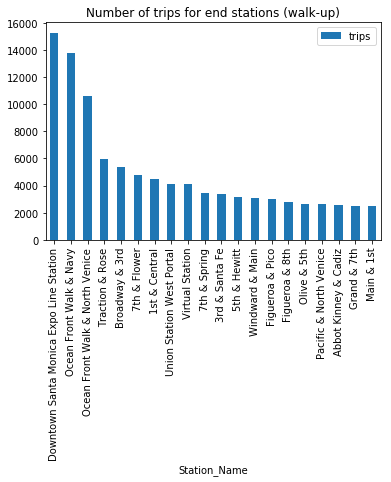

In [64]:
top_20_walk_up_end = top_20_walk_up_end.merge(stations,left_on='end_station',right_on='Station_ID')
top_20_walk_up_end = top_20_walk_up_end.drop(columns=['Station_ID'])
top_20_walk_up_end.plot(x='Station_Name',y='trips',kind='bar',title='Number of trips for end stations (walk-up)')

Unlike the graph for start stations which had two stations, there are three end stations that obviously trump the rest. If you take a closer look, you will notice that the most frequently used end station is "Downtown Santa Monica Expo Line Station" which is different than the most frequently used start stations which are after this one.

Let's see where this station is located.

In [65]:
top_20_walk_up_end.head()

,end_station,trips,Station_Name,Region,Status
0,4215.0,15267,Downtown Santa Monica Expo Line Station,Venice,Active
1,4214.0,13803,Ocean Front Walk & Navy,Venice,Active
2,4210.0,10574,Ocean Front Walk & North Venice,Venice,Active
3,3082.0,5974,Traction & Rose,DTLA,Active
4,3069.0,5363,Broadway & 3rd,DTLA,Active


Similarly to the top start stations, the top end stations are also located in Venice. However, why is the most frequently used end station different from the start station even though the riders share that common walk-up pass?

Looking closer at the specific street that the station is located at, it is clear why this specific station is the most frequently used end station. After returning the bike, the rider has no form of transportation so it would make sense to return the bike at the Expo Line station so they can hop onto one of the many lines that Los Angelos offers.

Now that we know the most frequently used start and end stations for walk-up users, let's see how having a monthly pass affects the start and end stations used as opposed to having a walk-up pass.

In [66]:
monthly = (bike_data.loc[bike_data['passholder_type'] == 'Monthly Pass'])
monthly.head()

,bike_id,bike_type,passholder_type,duration,trip_route_category,estimated_fare,temperature,humidity,windspeed,weather,start_station,end_station,start_time,end_time,start_lat_lon,end_lat_lon
15,15060,electric,Monthly Pass,644,One Way,36.75,54,17,5,Few Clouds,3031.0,3032.0,2018-12-31 23:26:00,2019-01-01 10:10:00,"(34.044701, -118.25244099999999)","(34.049889, -118.255882)"
18,5784,standard,Monthly Pass,8,One Way,0.00,54,17,5,Few Clouds,3068.0,3074.0,2018-12-31 23:07:00,2018-12-31 23:15:00,"(34.0532, -118.25095400000001)","(34.04417, -118.261169)"
19,15060,electric,Monthly Pass,25,One Way,0.00,54,17,5,Few Clouds,3029.0,3031.0,2018-12-31 23:00:00,2018-12-31 23:25:00,"(34.048851, -118.246422)","(34.044701, -118.25244099999999)"
20,6026,standard,Monthly Pass,14,One Way,0.00,54,17,5,Few Clouds,3063.0,3062.0,2018-12-31 22:57:00,2018-12-31 23:11:00,"(34.048038, -118.25373799999998)","(34.047748999999996, -118.243172)"
22,6637,standard,Monthly Pass,6,One Way,0.00,54,17,5,Few Clouds,3005.0,3075.0,2018-12-31 22:53:00,2018-12-31 22:59:00,"(34.0485, -118.25853700000002)","(34.04211, -118.25618700000001)"


Similarly to what we did for walk-up pass, we will do the same procedure of dropping unnecessary columns and separating the start and end stations for the monthly pass riders.

In [67]:
monthly = monthly.drop(columns=['bike_type','temperature','humidity','windspeed','weather','start_time','end_time','start_lat_lon','end_lat_lon'])
monthly.head()

,bike_id,passholder_type,duration,trip_route_category,estimated_fare,start_station,end_station
15,15060,Monthly Pass,644,One Way,36.75,3031.0,3032.0
18,5784,Monthly Pass,8,One Way,0.00,3068.0,3074.0
19,15060,Monthly Pass,25,One Way,0.00,3029.0,3031.0
20,6026,Monthly Pass,14,One Way,0.00,3063.0,3062.0
22,6637,Monthly Pass,6,One Way,0.00,3005.0,3075.0


In [68]:
monthly_start = monthly['start_station'].value_counts().to_frame(name='trips')
monthly_end = monthly['end_station'].value_counts().to_frame(name='trips')
top_20_monthly_start = monthly_start.reset_index().rename(columns={'index': 'start_station'})[:20]
top_20_monthly_end = monthly_end.reset_index().rename(columns={'index': 'end_station'})[:20]

Just like what we did for the start and end stations for the walk-up pass riders, let's combine the station information for the top 20 monthly start/end stations and analyze the start stations first.

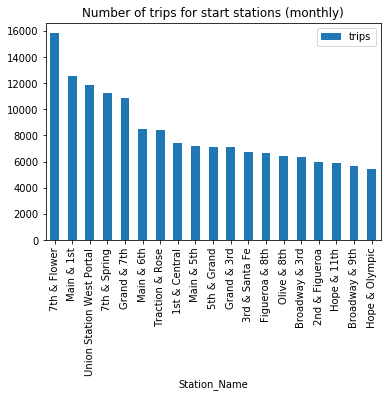

In [69]:
top_20_monthly_start = top_20_monthly_start.merge(stations,left_on='start_station',right_on='Station_ID')
top_20_monthly_start = top_20_monthly_start.drop(columns=['Station_ID'])
top_20_monthly_start.plot(x='Station_Name',y='trips',kind='bar',title='Number of trips for start stations (monthly)')

The first station immediately catches your eye as it towers over the rest of the stations while the number of trips for the other stations are slowly decreasing.

Let's see where these stations are located overall.

In [70]:
top_20_monthly_start

,start_station,trips,Station_Name,Region,Status
0,3005.0,15834,7th & Flower,DTLA,Active
1,3030.0,12534,Main & 1st,DTLA,Active
2,3014.0,11835,Union Station West Portal,DTLA,Active
3,3031.0,11216,7th & Spring,DTLA,Active
4,3064.0,10873,Grand & 7th,DTLA,Active
5,3067.0,8452,Main & 6th,DTLA,Active
6,3082.0,8380,Traction & Rose,DTLA,Active
7,3042.0,7414,1st & Central,DTLA,Active
8,3038.0,7195,Main & 5th,DTLA,Active
9,3007.0,7142,5th & Grand,DTLA,Active


ALL of the start stations for monthly pass users are located in DTLA (Downtown Los Angeles). At first glance, this may be surprising, but it actually makes a lot of sense why the top 20 most frequently used start stations are in DTLA. Since these riders have monthly passes, they most likely live in Los Angeles so they do not have as strong as a desire to go to all of the "tourist attractions" than the people who do not live in Los Angeles have.

However, why is there a noticeable difference between the most frequently used start station and the rest? The "7th & Flower" is located in the financial district of DTLA which is most likely why it is the most used start station as there are many cars that drive in that area since it is in heart of DTLA; making it hard to navigate via car unless you have a bike that can easily navigate through traffic.

Let's see if the end stations for monthly pass holders are going to be the same or similar to this.

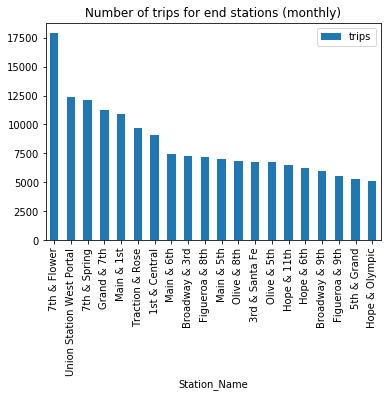

In [71]:
top_20_monthly_end = top_20_monthly_end.merge(stations,left_on='end_station',right_on='Station_ID')
top_20_monthly_end = top_20_monthly_end.drop(columns=['Station_ID'])
top_20_monthly_end.plot(x='Station_Name',y='trips',kind='bar',title='Number of trips for end stations (monthly)')

Similar to the start stations, the first end station dominates the others in the number of trips. Additionally, the most frequently used end station is the same as the most frequently used start station as opposed to the case with the walk-up riders where the most frequently used start and end stations were completely different. This is probably due to the fact that monthly pass riders need to go to the financial district as it contains most of the important buildings where the residents of Los Angeles work at. Additionally, there are various activities that most tourists do not consider "must see" to partake in such as eat, visit museums, shop, etc.

Now, let's see if the end stations are like the start stations in which all of the stations were overall located in the DTLA region.

In [72]:
top_20_monthly_end

,end_station,trips,Station_Name,Region,Status
0,3005.0,17920,7th & Flower,DTLA,Active
1,3014.0,12367,Union Station West Portal,DTLA,Active
2,3031.0,12154,7th & Spring,DTLA,Active
3,3064.0,11216,Grand & 7th,DTLA,Active
4,3030.0,10934,Main & 1st,DTLA,Active
5,3082.0,9652,Traction & Rose,DTLA,Active
6,3042.0,9095,1st & Central,DTLA,Active
7,3067.0,7454,Main & 6th,DTLA,Active
8,3069.0,7251,Broadway & 3rd,DTLA,Active
9,3035.0,7173,Figueroa & 8th,DTLA,Active


To no surprise, all of the end stations are also located in DTLA. As stated earlier, this is most likely due to the fact that monthly pass riders are Los Angeles residents who have most likely already visited all of the tourist attractions and feel no desire to do so.

Overall, there is a significant difference in the most frequently used start and end stations between the walk-up riders and the monthly pass riders. Walk-up riders are more inclined to go to tourist spots like Venice while monthly pass users stay in DTLA where they can continue on with their daily lives. Metro Bike Share is not only giving the tourists an affordable mean of transportation, but also the residents of Los Angeles who need to get from place to place to carry on their day -- benefitting all of Los Angeles.